# Chapter 3 Linear Regression

- 3.1 Simple linear regression
    - Estimate the coefficients: least square criterion
    - Accuracy of coefficients: standard error and p-value of coefficients
    - Accuracy of model: RSE, R^2
- 3.2 Multiple linear regression
    1. Test of the relationship between response and predictors: F-test
    2. Variable selection: forward, backward, mixed
    3. Model fit: RSS, RSE
    4. Predictions: confidence interval, prediction interval
- 3.3 Other considerations in regression model
    - Qualitative predictors: dummy variable
    - Extensions of linear model
        - Assumption one: additive -- Interaction term
        - Assumption two: linear -- polynomial regression
    - Potential problems
        1. Non-linearity: residual plot, transform predictors(logX, sqrt(X))
        2. Correlation of error terms: time series data, residual plot
        3. Non-constant variance of error terms: funnel shape in residual plot, transfer response(logY)
        4. Outliers: studentized residuals plot
        5. High-leverage points
        6. Collinearity: VIF
- 3.4 Seven questions about Advertising data
- 3.5 Linear regression vs K-nearest neighbors

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.notebook_repr_html', False)
 
%matplotlib inline
plt.style.use('seaborn-white')

In [10]:
# Load datasets
advertising = pd.read_csv('Data/Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [67]:
auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [8]:
credit = pd.read_csv('Data/Credit.csv', usecols= list(range(1,12)))
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
credit.head()

    Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.891   3606     283      2   34         11    Male      No     Yes   
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   
3  148.924   9504     681      3   36         11  Female      No      No   
4   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  Student2  
0  Caucasian      333         0  
1      Asian      903         1  
2      Asian      580         0  
3      Asian      964         0  
4  Caucasian      331         0  

## 3.1 Simple linear regression

### Figure 3.1-Simple linear regression (Advertising)

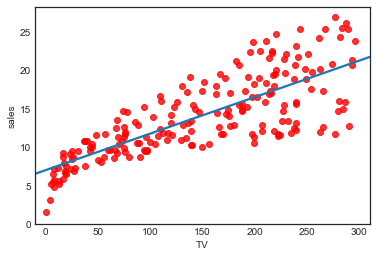

In [6]:
sns.regplot(advertising.TV, advertising.sales, order=1, ci=None, scatter_kws={'color':'r'})
plt.xlim(-10,310)
plt.ylim(ymin=0);

### Figure 3.2 - Regression coefficients and RSS

In [37]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()
X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

14.0225
[ 0.04753664]


In [39]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.reshape(-1,1))**2)/1000
min_rss

/Users/wen/code/pylearn/venv/lib/python2.7/site-packages/ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]


2.1025305831313514

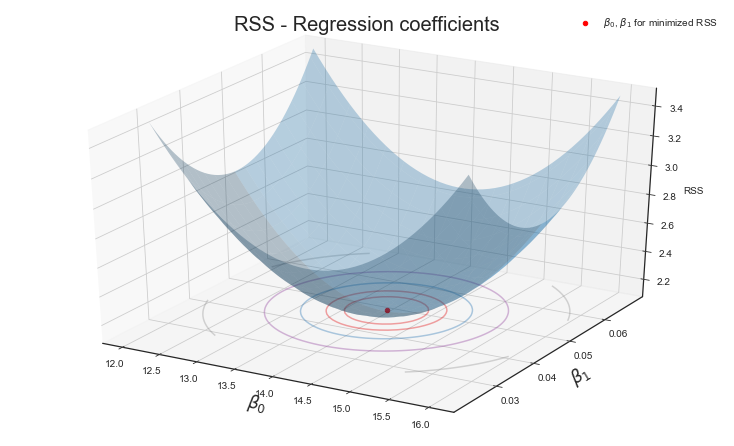

In [44]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax = Axes3D(fig)
ax.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax.set_zlabel('RSS')
ax.set_zlim(Z.min(),Z.max())
ax.set_ylim(0.02,0.07)

ax.set_xlabel(r'$\beta_0$', fontsize=17)
ax.set_ylabel(r'$\beta_1$', fontsize=17)
ax.set_yticks([0.03,0.04,0.05,0.06])
ax.legend()
plt.show()

### Table 3.1 Detail results of simple linear regression 

In [46]:
est = smf.ols('sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


## 3.2 Multiple linear regression

### Table 3.3 Detail results of simple linear regression

In [48]:
est = smf.ols('sales ~ radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [51]:
est = smf.ols('sales ~ newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


### Table 3.4 Detail result of multiple linear regression

In [52]:
est = smf.ols('sales ~ TV + radio + newspaper', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 19 Sep 2017   Prob (F-statistic):           1.58e-96
Time:                        21:54:38   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Table 3.5 Correlation matrix

In [53]:
advertising.corr()

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

### Figure 3.6 Multiple linear regression (Advertising)

In [56]:
regr = skl_lm.LinearRegression()

X = advertising[['radio', 'TV']].as_matrix()
y = advertising.sales

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[ 0.18799423  0.04575482]
2.92109991241


In [57]:
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

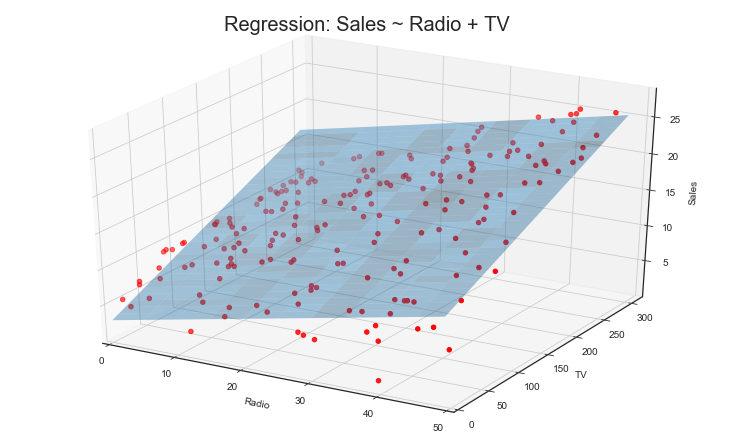

In [58]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV', fontsize=20)

ax = Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising.radio, advertising.TV, advertising.sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');

### Figure 3.6 Pair plot (Credit)

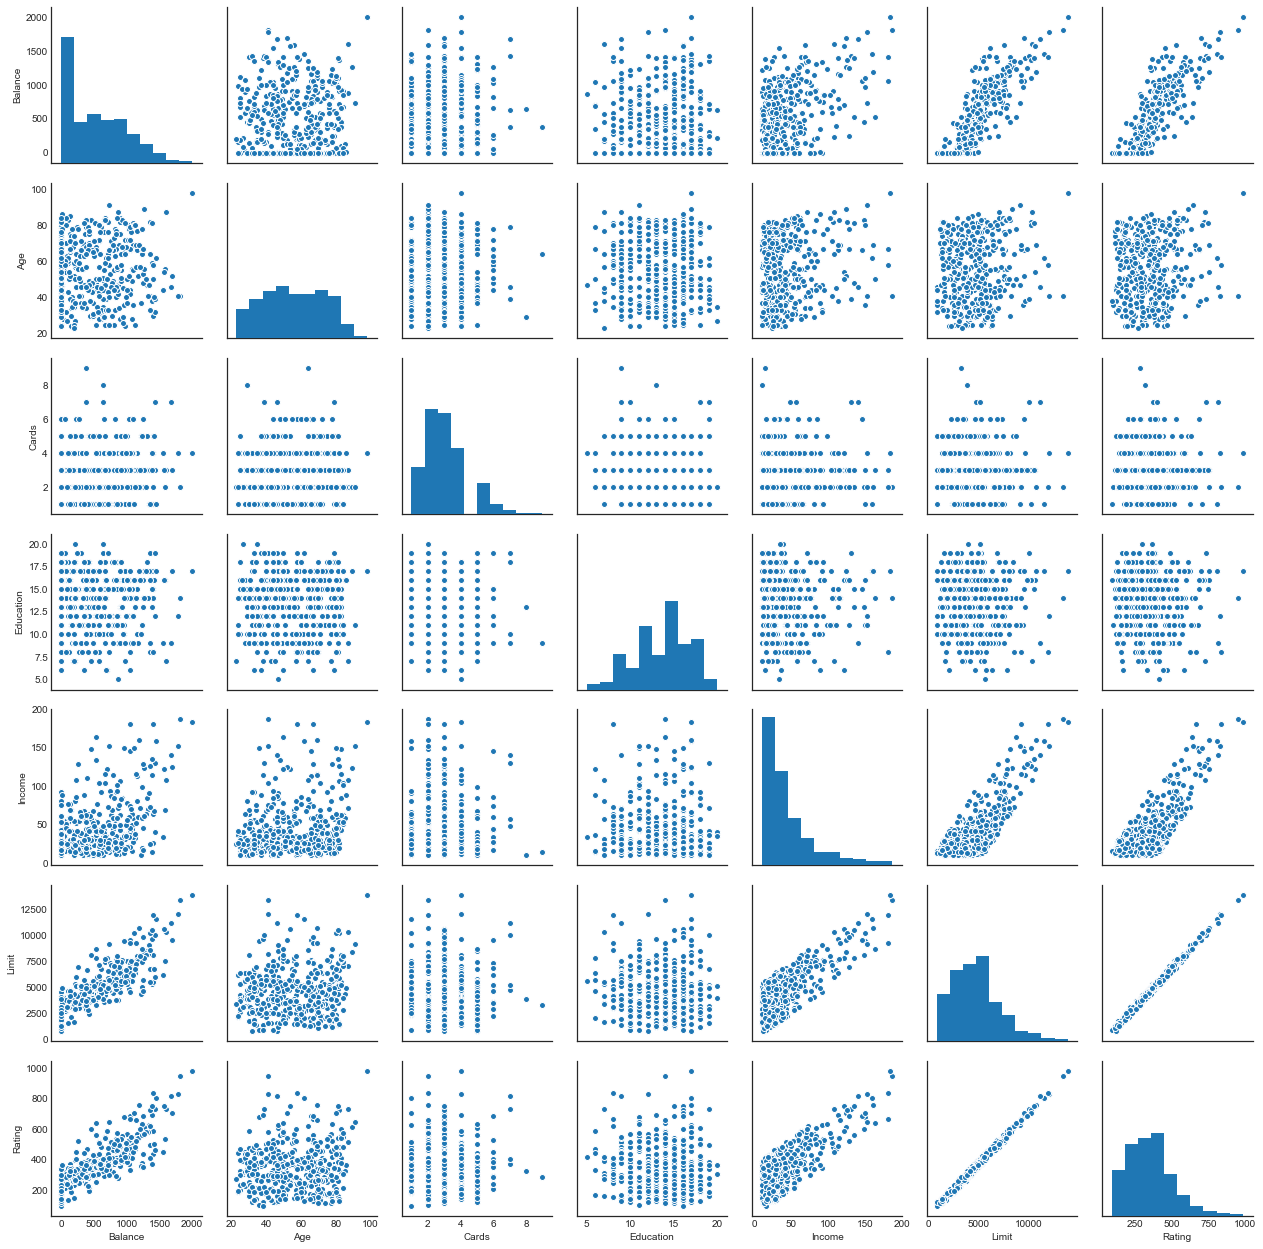

In [60]:
sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']])

### Table 3.7 Qualitative predictor (two levels)

In [61]:
est = smf.ols('Balance ~ Gender', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Gender[T.Female],19.7331,46.051,0.429,0.669,-70.801,110.267


### Table 3.8 Qualitative predictor (More than two levels)

In [62]:
est = smf.ols('Balance ~ Ethnicity', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


### Table 3.9 Interaction effect (Advertising)

In [63]:
est = smf.ols('sales ~ TV + radio + TV*radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


### Figure 3.8 Non-linear relationship: polynomials

(40, 240)

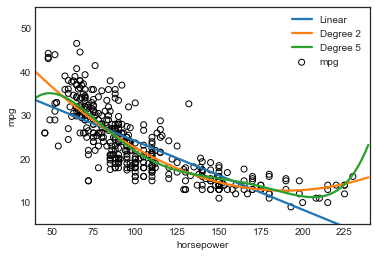

In [69]:
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k') 
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False)
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2', order=2, scatter=False)
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5', order=5, scatter=False)
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240)

### Table 3.10 Polynomial regression (Auto)

In [70]:
auto['horsepower2'] = auto.horsepower**2
est = smf.ols('mpg ~ horsepower + horsepower2', auto).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
horsepower2,0.0012,0.000,10.080,0.000,0.001,0.001


### Figure 3.9 Residual Plot -- Check linearity of data

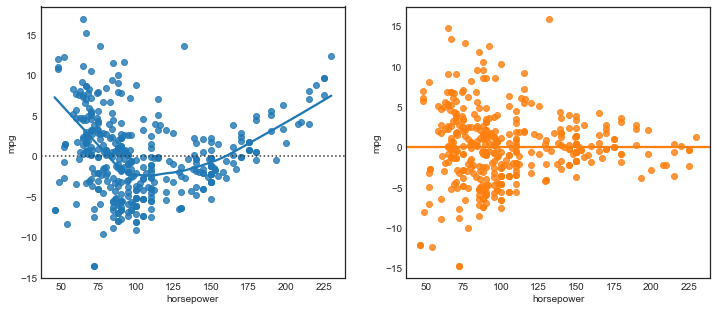

In [78]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

sns.residplot(auto.horsepower, auto.mpg, lowess=True, ax=ax1)
sns.residplot(auto.horsepower, auto.mpg, order=2 ,lowess=True, ax=ax2)